### Demonstration of Bayesian Perception Concepts

# Case 2: Inherent modularity as demonstrated by integrating distance measurements from several models

## Example 1: Integrating distance measurements of a 'far-away' object using sevaral models and a prior.

Assumptions:
- Detected object hypothesis is 'car'
- Deep models based on different sensor modalities
  - LiDAR-based deep model
  - Image-based deep model
  - Radar-based deep model
- Prior based on projecting point measurement cluster center to nearest road lane position according to a map (internally or pre-generated)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import gaussian

np.random.seed(seed=0)

### Measurements

The true distance of the observed object is a hidden parameter we cannot observe directly.

We assume the measurement device outputs an approximate estimates which is **noisy but not biased**, and therefore can be **modeled by a Gaussian distribution**, where samples denote actual measurement values.

The measurement variance is known and is assumed to be a **learned function** which depends on the model/device and **environmental parameters**:
- Approximate distance rage (i.e. order of 10 or 100 meters?)
- Illumination (i.e. daylight or dusk)
- Approximate size of object (i.e. large truck or pedestrian?)
- etc.

true distance: 120
    model_1: 146.5 m, (var: 15 m)
    model_2: 128.0 m, (var: 20 m)
    model_3: 139.6 m, (var: 30 m)


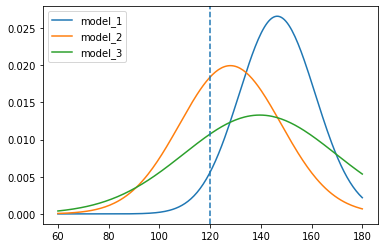

In [2]:
# Unobservable true velocity
true_dist = 120  # [km/h]

# Measurement values are sampled from Gaussian distribution (mu=true distance, sigma^2=10)
model_1_sigma = 15
model_1_mu = np.random.normal(true_dist, model_1_sigma)
model_2_sigma = 20
model_2_mu = np.random.normal(true_dist, model_2_sigma)
model_3_sigma = 30
model_3_mu = np.random.normal(true_dist, model_2_sigma)

print(f"true distance: {true_dist}")
print(f"    model_1: {model_1_mu:.1f} m, (var: {model_1_sigma} m)")
print(f"    model_2: {model_2_mu:.1f} m, (var: {model_2_sigma} m)")
print(f"    model_3: {model_3_mu:.1f} m, (var: {model_3_sigma} m)")

gaussian.plot([model_1_mu, model_2_mu, model_3_mu], [model_1_sigma, model_2_sigma, model_3_sigma], 60, 180, true_dist, ["model_1", "model_2", "model_3"])

### Prior

The distance prior is dependent on the reconstructed road lane structure (either generated using onboard sensors or loaded from a pre-generated map) by mapping the cluster center of all position measurement estimates to the closest point of a road lane. Hence the prior can be formulated as "assuming all cars are generally situated on road lanes, and thus the measured positions are centered around a point on a road lane".

In this hypotetical case, the closest road lane point results in a position 110 m away from the ego-vehicle (for example, a point on the opposite road lane). The estimated variance could be a learned function of environmental parameters and the variance of the estimated position itself:
- Approximate distance rage (i.e. order of 10 or 100 meters?)
- Illumination (i.e. daylight or dusk)
- Approximate size of object (i.e. large truck or pedestrian?)
- etc.

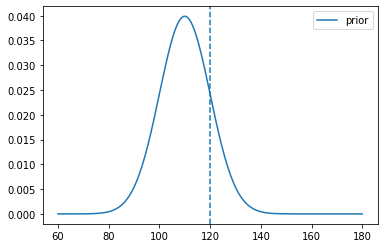

In [3]:
prior_mu = 110
prior_sigma = 10

gaussian.plot([prior_mu], [prior_sigma], 60, 180, true_dist, ["prior"])

### Bayesian inference

The true distance is estimated by integrating the prior and noisy measurements using Baye's theorem. This operation leverages the estimated uncertainty to integrate information from both the senses and prior knowledge in a principled manner using the laws of probability.

Biological minds are theorized to do approximate Bayesian inference as well.

Model 1: 146.5, var 15 m
      Error: (meas) 26.46078518951495 -> (posterior) 4.5843140758059775 m


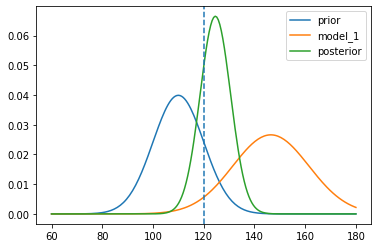

Model 2: 128.0, var 20 m
      Error: (meas) 8.003144167344459 -> (posterior) 5.373274866161012 m


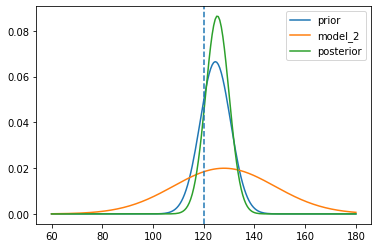

Model 3: 139.6, var 30 m
      Error: (meas) 19.574759682114774 -> (posterior) 7.266806174954866 m


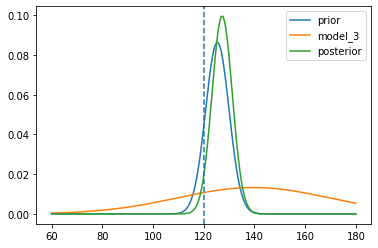

In [4]:
prior_mu = 110
prior_sigma = 10

# Model 1
posterior_mu, posterior_sigma = gaussian.bayes_inf(model_1_mu, model_1_sigma, prior_mu, prior_sigma)
print(f"Model 1: {model_1_mu:.1f}, var {model_1_sigma} m\n      Error: (meas) {model_1_mu-true_dist} -> (posterior) {posterior_mu-true_dist} m")
gaussian.plot([prior_mu, model_1_mu, posterior_mu], [prior_sigma, model_1_sigma, posterior_sigma], 60, 180, true_dist, ["prior", "model_1", "posterior"])

# Update prior with posterior
prior_mu = posterior_mu
prior_sigma = posterior_sigma

# Model 2
posterior_mu, posterior_sigma = gaussian.bayes_inf(model_2_mu, model_2_sigma, prior_mu, prior_sigma)
print(f"Model 2: {model_2_mu:.1f}, var {model_2_sigma} m\n      Error: (meas) {model_2_mu-true_dist} -> (posterior) {posterior_mu-true_dist} m")
gaussian.plot([prior_mu, model_2_mu, posterior_mu], [prior_sigma, model_2_sigma, posterior_sigma], 60, 180, true_dist, ["prior", "model_2", "posterior"])

# Update prior with posterior
prior_mu = posterior_mu
prior_sigma = posterior_sigma

# Model 3
posterior_mu, posterior_sigma = gaussian.bayes_inf(model_3_mu, model_3_sigma, prior_mu, prior_sigma)
print(f"Model 3: {model_3_mu:.1f}, var {model_3_sigma} m\n      Error: (meas) {model_3_mu-true_dist} -> (posterior) {posterior_mu-true_dist} m")
gaussian.plot([prior_mu, model_3_mu, posterior_mu], [prior_sigma, model_3_sigma, posterior_sigma], 60, 180, true_dist, ["prior", "model_3", "posterior"])


### Conclusion

Integrating measurements with a prior is expected to reduce the magnitude of the largest measurement errors and thus stabilize the measurement.